<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/Non_Linear_Regression_using_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install keras_core

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
os.environ["KERAS_BACKEND"] = "jax"

import jax
import keras_core as jaxk
import keras_core.layers as jaxkl
import keras_core.models as jaxkm
import keras_core.utils as jaxku

Using JAX backend.


In [ ]:
N = 100
PRED_N = 100000
EPOCHS = 1000
BATCH_SIZE = 8

alpha = 4
beta_1 = 2
beta_2 = 3
beta_3 = 4
omega_1 = 1
omega_2 = 2
omega_3 = 3

sigma = 2

In [ ]:
data_df = pd.DataFrame({
    'x' : np.random.uniform(low = -1, high = 1, size = N),
    'e' : np.random.normal(loc = 0, scale = 1, size = N)
})

In [ ]:
data_df.eval('y = @alpha + @beta_1 * exp(@omega_1 *x) + @beta_2 * exp(@omega_2 * x) + @beta_3 * exp(@omega_3 * x) + @sigma * e', inplace = True)
data_df.drop('e', axis = 1, inplace = True)

<Axes: xlabel='variable', ylabel='value'>

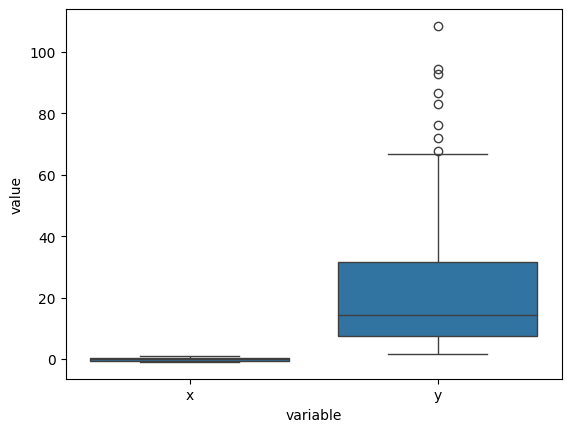

In [ ]:
sns.boxplot(data = data_df.melt(), x = 'variable', y = 'value')

<Axes: >

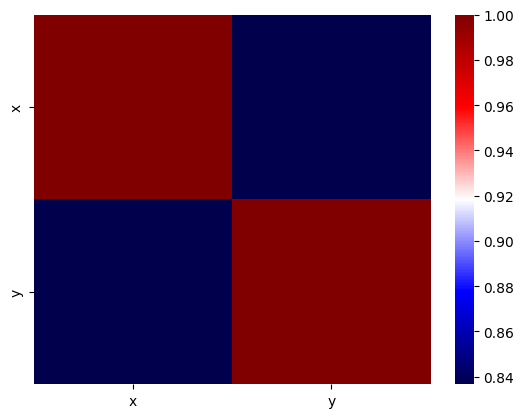

In [ ]:
sns.heatmap(data_df.corr(), cmap = 'seismic')

In [ ]:
X = data_df[['x']].values
Y = data_df[['y']].values

In [ ]:
model = jaxkm.Sequential([
    jaxkl.InputLayer([1]),
    jaxkl.Dense(3, activation = 'softplus'),
    jaxkl.Dense(3, activation = 'softplus'),
    jaxkl.Dense(1)
])

In [ ]:
model.compile(
    optimizer = jaxk.optimizers.Adam(),
    loss = jaxk.losses.MeanSquaredError(),
    metrics = [jaxk.metrics.MeanAbsoluteError(), jaxk.metrics.MeanSquaredError()]
)

In [ ]:
cb = model.fit(x = X, y = Y, shuffle = True, epochs = EPOCHS, batch_size = BATCH_SIZE)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - loss: 1154.8439 - mean_absolute_error: 23.1373 - mean_squared_error: 1151.8361
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 887.4276 - mean_absolute_error: 21.1445 - mean_squared_error: 891.9431
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1099.1410 - mean_absolute_error: 22.5848 - mean_squared_error: 1099.8739 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1008.9006 - mean_absolute_error: 21.9341 - mean_squared_error: 1013.8724
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1028.3096 - mean_absolute_error: 21.6018 - mean_squared_error: 1013.9852
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 870.8062 - mean_absolute_error: 20.1099 - mean_squared_error: 872.5112 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 827.9851 - mean_absolute_error: 18.8206 - mean_squared_error: 832.6168
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1018.1046 -

In [ ]:
pred_df = pd.DataFrame({
    'x' : np.linspace(start = -1, stop = 1, num = PRED_N + 1, endpoint = True)
})

pred_df[['y']] = model.predict(pred_df[['x']])

3126/3126 ━━━━━━━━━━━━━━━━━━━━ 1s 182us/step


<Axes: xlabel='x', ylabel='y'>

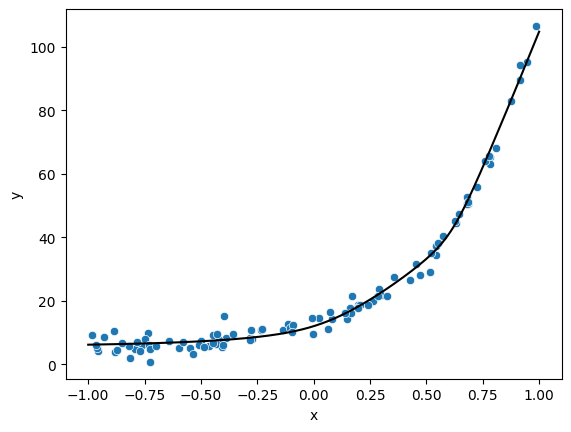

In [ ]:
sns.scatterplot(x = 'x', y = 'y', data = data_df)
sns.lineplot(x = 'x', y = 'y', data = pred_df, color = 'black')